<a href="https://colab.research.google.com/github/dmi3eva/araneae/blob/main/p1_spider_analysis/02_binary_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mounting

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
%cd /content
%cd drive
%cd My\ Drive
%cd PhD
%cd Paper_01

/content
/content/drive
/content/drive/My Drive
/content/drive/My Drive/PhD
/content/drive/My Drive/PhD/Paper_01


In [80]:
DB_PATH = "datasets/spider/database"
SCHEMES_PATH = "datasets/spider/tables.json"

### Loading

In [ ]:
import json

In [ ]:
with open('araneae_basic.json') as json_file:
  araneae_basic = json.load(json_file)

In [ ]:
len(araneae_basic)

9693

In [ ]:
araneae_basic[0]

{'db_id': 'concert_singer',
 'query': 'SELECT count(*) FROM singer',
 'query_toks': ['SELECT', 'count', '(', '*', ')', 'FROM', 'singer'],
 'query_toks_no_value': ['select', 'count', '(', '*', ')', 'from', 'singer'],
 'question': 'How many singers do we have?',
 'question_toks': ['How', 'many', 'singers', 'do', 'we', 'have', '?'],
 'source': 'spider-dev',
 'sql': {'except': None,
  'from': {'conds': [], 'table_units': [['table_unit', 1]]},
  'groupBy': [],
  'having': [],
  'intersect': None,
  'limit': None,
  'orderBy': [],
  'select': [False, [[3, [0, [0, 0, False], None]]]],
  'union': None,
  'where': []}}

In [ ]:
import collections
import matplotlib.pyplot as plt
import sqlite3
import os

In [ ]:
%matplotlib inline 

### Utils

In [ ]:
def execute_request(db_id, sql):
    db = os.path.join(DB_PATH, db_id, db_id + ".sqlite")
    conn = sqlite3.connect(db)
    cursor = conn.cursor()
    try:
        cursor.execute(sql)
        res = cursor.fetchall()
        return res
    except:
        raise ValueError

In [ ]:
REQUEST_MASK = """SELECT {column} FROM {table}""" 
def get_values(db, table, column):
  # Возвращает значения из столбца данной таблицы
  if " " in table:
    table = f"\"{table}\""
  if " " in column:
    column = f"\"{column}\""
  aim_request = REQUEST_MASK.format(table=table, column=column)
  try:
    response = execute_request(db, aim_request)
    values = [str(_v[0]) for _v in list(response)]
    return values
  except ValueError:
    print()
    print(f"Problem with {column} in {table} (db = {db}). Request: {aim_request}")
    return []

In [ ]:
db_ids = os.listdir(DB_PATH)

In [ ]:
with open(TABLES_PATH) as table_file:
  tables = json.load(table_file)

In [ ]:
with open(SCHEMES_PATH) as table_file:
  schemes = json.load(table_file)

tables = {_s['db_id']: _s['table_names_original'] for _s in schemes}

In [ ]:
columns = {
    _s['db_id']: {
        _table: [] for _table in _s['table_names_original']
    } for _s in schemes
}
for _scheme in schemes:
  db_id = _scheme['db_id']
  table_names = _scheme['table_names_original']
  for _column in _scheme["column_names_original"]:
    column_name = _column[1]
    table_name = table_names[_column[0]]
    if column_name == '*':
      continue
    columns[db_id][table_name].append(column_name)

In [ ]:
def get_db_tables(db):
  return tables[db]

In [ ]:
def get_db_columns(db, table):
  return columns[db][table]

### Analysis

In [81]:
def get_db_with_binary_values():
  amounts = {}
  for _db_id in db_ids:
    tables = get_db_tables(_db_id)
    for _table in tables:
      columns = get_db_columns(_db_id, _table)
      for _column in columns:
        values = get_values(_db_id, _table, _column)  
        size = len(values)      
        amounts[size] = amounts.get(size, []) + [{
            "db_id": _db_id,
            "table": _table,
            "column": _column,
            "values": values
        }]
  return amounts

In [82]:
amounts = get_db_with_binary_values()


Problem with %_Change_2007 in airport (db = aircraft). Request: SELECT %_Change_2007 FROM airport

Problem with Official_ratings_(millions) in performance (db = orchestra). Request: SELECT Official_ratings_(millions) FROM performance

Problem with From in train (db = railway). Request: SELECT From FROM train

Problem with 18_49_Rating_Share in TV_series (db = tvshow). Request: SELECT 18_49_Rating_Share FROM TV_series

Problem with first_name in players (db = wta_1). Request: SELECT first_name FROM players

Problem with last_name in players (db = wta_1). Request: SELECT last_name FROM players


In [ ]:
amounts[2]

["db_id=behavior_monitoring; table=Ref_Address_Types; column=address_type_code; values=['BILL', 'HOME']",
 "db_id=behavior_monitoring; table=Ref_Address_Types; column=address_type_description; values=['Billing', 'Home or Residence']",
 "db_id=cre_Docs_and_Epenses; table=Statements; column=Statement_ID; values=['57', '192']",
 "db_id=cre_Docs_and_Epenses; table=Statements; column=Statement_Details; values=['Open Project', 'Private Project']",
 "db_id=cre_Drama_Workshop_Groups; table=Invoice_Items; column=Invoice_Item_ID; values=['1', '2']",
 "db_id=cre_Drama_Workshop_Groups; table=Invoice_Items; column=Invoice_ID; values=['128', '162']",
 "db_id=cre_Drama_Workshop_Groups; table=Invoice_Items; column=Order_ID; values=['1', '4']",
 "db_id=cre_Drama_Workshop_Groups; table=Invoice_Items; column=Order_Item_ID; values=['5', '6']",
 "db_id=cre_Drama_Workshop_Groups; table=Invoice_Items; column=Product_ID; values=['396', '191']",
 "db_id=cre_Drama_Workshop_Groups; table=Invoice_Items; column=Or

In [83]:
amounts[2]

[{'column': 'address_type_code',
  'db_id': 'behavior_monitoring',
  'table': 'Ref_Address_Types',
  'values': ['BILL', 'HOME']},
 {'column': 'address_type_description',
  'db_id': 'behavior_monitoring',
  'table': 'Ref_Address_Types',
  'values': ['Billing', 'Home or Residence']},
 {'column': 'Statement_ID',
  'db_id': 'cre_Docs_and_Epenses',
  'table': 'Statements',
  'values': ['57', '192']},
 {'column': 'Statement_Details',
  'db_id': 'cre_Docs_and_Epenses',
  'table': 'Statements',
  'values': ['Open Project', 'Private Project']},
 {'column': 'Invoice_Item_ID',
  'db_id': 'cre_Drama_Workshop_Groups',
  'table': 'Invoice_Items',
  'values': ['1', '2']},
 {'column': 'Invoice_ID',
  'db_id': 'cre_Drama_Workshop_Groups',
  'table': 'Invoice_Items',
  'values': ['128', '162']},
 {'column': 'Order_ID',
  'db_id': 'cre_Drama_Workshop_Groups',
  'table': 'Invoice_Items',
  'values': ['1', '4']},
 {'column': 'Order_Item_ID',
  'db_id': 'cre_Drama_Workshop_Groups',
  'table': 'Invoice_Items

In [ ]:
all_sizes = {_k: len(_v) for _k, _v in amounts.items()}
all_sizes

{0: 274,
 1: 2,
 2: 52,
 3: 108,
 4: 110,
 5: 203,
 6: 298,
 7: 191,
 8: 243,
 9: 113,
 10: 201,
 11: 106,
 12: 102,
 13: 68,
 14: 50,
 15: 1081,
 16: 35,
 17: 9,
 18: 15,
 19: 28,
 20: 106,
 21: 7,
 22: 13,
 23: 26,
 25: 7,
 26: 6,
 27: 4,
 30: 3,
 31: 6,
 34: 72,
 36: 8,
 37: 7,
 40: 4,
 50: 4,
 52: 10,
 57: 6,
 58: 16,
 59: 28,
 60: 4,
 63: 3,
 69: 7,
 70: 9,
 73: 9,
 76: 7,
 93: 10,
 100: 19,
 107: 11,
 109: 3,
 120: 4,
 134: 2,
 177: 6,
 200: 8,
 208: 5,
 210: 3,
 239: 15,
 250: 6,
 275: 4,
 278: 32,
 299: 5,
 305: 2,
 307: 9,
 320: 3,
 347: 6,
 395: 5,
 406: 11,
 412: 18,
 414: 7,
 500: 11,
 599: 9,
 600: 13,
 603: 8,
 842: 9,
 984: 4,
 997: 8,
 1000: 16,
 1113: 4,
 1200: 4,
 1207: 5,
 1458: 25,
 2000: 6,
 2240: 10,
 2805: 48,
 2944: 9,
 3405: 10,
 3503: 18,
 3665: 24,
 4079: 5,
 4120: 9,
 4581: 4,
 5069: 8,
 5109: 30,
 5462: 3,
 6078: 6,
 6162: 7,
 6795: 7,
 7184: 9,
 7516: 9,
 8487: 4,
 8715: 4,
 9959: 11,
 11060: 7,
 11142: 5,
 11690: 22,
 11896: 7,
 12028: 6,
 12311: 17,
 160

In [ ]:
size_values = []
last_number = sorted(list(all_sizes.keys()))[-1]
print(last_number)
for i in range(last_number + 1):
  if i not in all_sizes.keys():
    size_values.append(0)
  else:
    size_values.append(all_sizes[i])

510437


(array([510437.]), array([   0, 1000]), <a list of 1 Patch objects>)

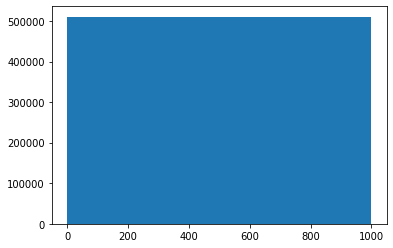

In [89]:
plt.hist(size_values, bins=[0, 1000])

<BarContainer object of 100 artists>

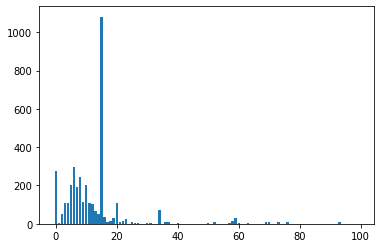

In [91]:
plt.bar(range(len(size_values[:100])), size_values[:100])

<BarContainer object of 20 artists>

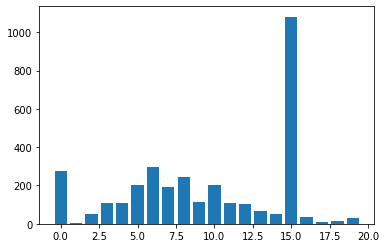

In [92]:
plt.bar(range(len(size_values[:20])), size_values[:20])

In [104]:
bin_size = 100000
bin_size_values = [sum(size_values[bin_size*i: bin_size*(i+1)]) for i in range(len(size_values)//bin_size)]

In [105]:
bin_size_values

[4395, 103, 0, 0, 0]

<BarContainer object of 5 artists>

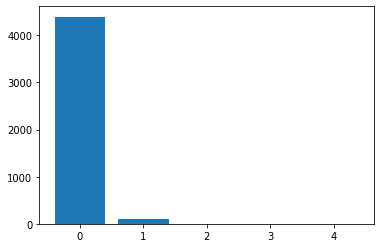

In [106]:
plt.bar(range(len(bin_size_values)), bin_size_values)

<BarContainer object of 51 artists>

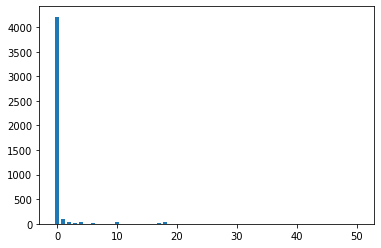

In [107]:
bin_size = 10000
bin_size_values = [sum(size_values[bin_size*i: bin_size*(i+1)]) for i in range(len(size_values)//bin_size)]
plt.bar(range(len(bin_size_values)), bin_size_values)

<BarContainer object of 50 artists>

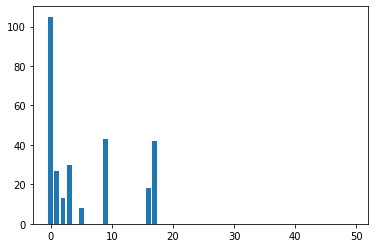

In [108]:
plt.bar(range(len(bin_size_values[1:])), bin_size_values[1:])

### Saving

In [84]:
with open('datasets/spider/by_amount_of_values/all.json', 'w') as json_file:
    json.dump(amounts, json_file)

In [86]:
for _size, _requests in amounts.items():
  with open(f'datasets/spider/by_amount_of_values/{str(_size).zfill(6)}.json', 'w') as json_file:
    json.dump(_requests, json_file)

### Zone of tests

In [ ]:
sql = "SELECT count( * ) FROM singer WHERE singer.Is_male = 1"
db_id = "concert_singer"
execute_request(db_id, sql)

[(0,)]

In [ ]:
res = get_values("perpetrator", "people", "Home Town")
res

['Los Angeles, CA',
 'Baton Rouge, LA',
 'Placentia, CA',
 'Westport, CT',
 'Beaver Dam, KY',
 'San Antonio, TX',
 'Denton, TX',
 'Los Angeles, CA',
 'Indianapolis, IN',
 'Altoona, PA',
 'Austin, TX']

In [ ]:
tables = get_db_tables("perpetrator")
tables

['perpetrator', 'people']

In [ ]:
columns = get_db_columns("perpetrator", "people")
columns

['People_ID', 'Name', 'Height', 'Weight', 'Home Town']